In [1]:
from fastai.text import *

In [2]:
path=Path('/kaggle/input/nlp-getting-started')
df = pd.read_csv(path/'train.csv')
print(df.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
train_df, valid_df = df.loc[:7613,:], df.loc[:1600,:]
data_lm = TextLMDataBunch.from_df(path, train_df, valid_df, text_cols=3, bs=32)
data_clas = TextClasDataBunch.from_df(path, train_df, valid_df, text_cols=3, label_cols=4, bs=32)


In [4]:
valid_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
1596,2304,collapse,NaN,Runaway Minion Causes Traffic Collapse in Dubl...,1
1597,2306,collapse,"Highland Park, CA",Time collapse is such a cool video technique. ...,0
1598,2307,collapse,Scotland,Would a paramedic really do that? Leave someon...,1
1599,2308,collapse,Swan River,@GeoffRickly I don't see the option to buy the...,0


In [5]:
data_lm.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # cafire # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj
1,... http : / / t.co / xxunk m via @change xxbos xxunk xxmaj please check into xxmaj salt xxmaj river horses help stop the annihilation about to happen without xxunk more xxunk xxunk xxmaj thx xxbos xxmaj are souls punished xxunk ? http : / / t.co / xxunk http : / / t.co / xxunk xxbos xxunk xxunk not to mention a major xxunk to the annihilation of
2,xxmaj suspected militants attacked a police post i ... http : / / t.co / xxunk xxbos @envw98 @nickcocofree @juliedicaro @jdabe80 i asked how did he feel attacked by julie . i asked if he was xxunk . xxmaj that is all . xxbos xxunk i feel attacked xxbos i 'm feeling so attacked https : / / t.co / xxunk xxbos xxmaj once again black men did n't make
3,my hands now my eyes are bleeding tears xxbos xxunk yea heard about that .. not coming out until xxunk and xxunk xxrep 6 ? xxmaj vampiro is bleeding xxbos xxunk xxmaj did that look broken or bleeding ? xxbos i hit my foot now my toe is bleeding ? ? xxbos xxunk _ xxmaj as long as i see xxmaj xxunk bleeding i 'm good ? ? xxbos xxmaj
4,killing this dude and tea bagging the dead body at this point xxbos @meekmill is xxunk league ball @drake is xxmaj olympic level body bagging him like his career was nothing # xxunk xxbos xxmaj xxunk who tough or who from xxmaj canada and who from north xxmaj philly meek been acting like a bitch & & drake been body bagging his ass on tracks xxbos xxunk body bagging mfs


In [6]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup followback \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos xxmaj no # news of # hostages in # xxmaj libya \n \n http : / / t.co / xxunk \n \n # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1
xxbos xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co / xxunk,1
xxbos xxmaj rare insight into # terror and xxmaj how to fight it http : / / t.co / xxunk # xxmaj cameroon # xxup usa # xxmaj xxunk # xxup xxunk # xxup fr # xxmaj nigeria # xxup uk # xxmaj africa # xxup de # xxup ca # xxup xxunk # xxup jp,1
xxbos xxmaj learn xxmaj how i xxmaj gained xxmaj access xxmaj to xxmaj the xxmaj secrets xxmaj of xxmaj the xxmaj top xxmaj earners & & xxmaj used xxmaj them xxmaj to xxmaj explode xxmaj my xxmaj home xxmaj business xxmaj here : http : / / t.co / xxunk xxmaj please # xxup rt,0


In [7]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3,model_dir="/kaggle/working")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


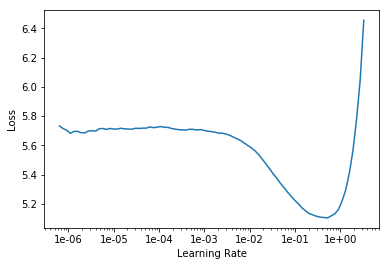

In [8]:
learn.lr_find() 
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.049223,3.395234,0.415625,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


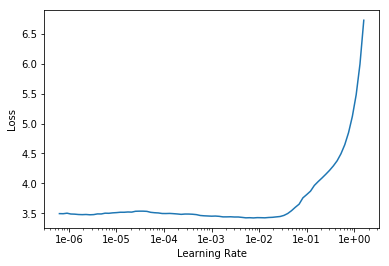

In [10]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()


In [11]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.331730,3.183027,0.445841,00:06
1,3.144799,2.863863,0.491118,00:06
2,2.885940,2.515924,0.536795,00:06
3,2.553081,2.063703,0.617975,00:06
4,2.175024,1.683710,0.687970,00:06
5,1.817622,1.361369,0.748520,00:06
6,1.538516,1.160905,0.789615,00:06
7,1.354190,1.048798,0.811772,00:06
8,1.250034,0.994212,0.821663,00:07
9,1.167821,0.983382,0.823191,00:06


In [12]:
TEXT = "I hate "
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))
learn.save_encoder('/kaggle/working/twitter-sentiment-enc')

I hate  people who sit down or come out with me on the beach and they 're the better one than i do . xxbos Fear is my pick for http : / / t.co / q2eblokeve Fan Army
I hate  this shit and i ca n't believe it . There are 24 dead people who burned 2 000000 deaddeaddeaddeaddeaddead 151515151515 xxbosxxbosxxbosxxbosxxbosxxbos Businesses are deluged with invoices . Make yours stand out with colour or shape


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


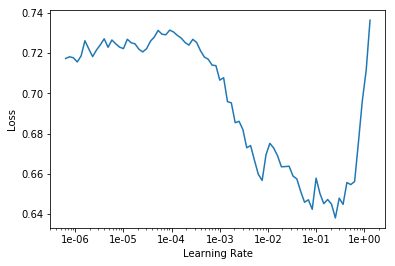

In [13]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3,model_dir='/kaggle/working')
learn.load_encoder('/kaggle/working/twitter-sentiment-enc')
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.513689,0.408300,0.821986,00:04


In [15]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.486825,0.359768,0.850094,00:05


In [16]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.471686,0.337449,0.858214,00:07


In [17]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.392664,0.313864,0.866958,00:08
1,0.374267,0.259760,0.901936,00:09
2,0.319792,0.178033,0.929419,00:09
3,0.265270,0.116572,0.965646,00:09
4,0.200931,0.078024,0.971893,00:09
5,0.163550,0.055169,0.979388,00:09
6,0.121951,0.049816,0.983136,00:08
7,0.108562,0.044330,0.982511,00:09
8,0.097080,0.039512,0.982511,00:09
9,0.097864,0.039083,0.982511,00:09


In [18]:
learn.save('/kaggle/working/model_nlp')
learn.export('/kaggle/working/model_nlp.pth')

In [19]:
clas,tens,prob=learn.predict("	Forest fire near La Ronge Sask. Canada")

In [20]:
clas

Category 1

In [21]:
test=pd.read_csv(path/'test.csv')
test=test['text']

In [22]:
prediction=[]
for i in range(3263):
    clas,tens,prob=learn.predict(test[i])
    prediction.append(clas)
    

In [23]:
sample_submission=pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [24]:
sample_submission['target']=prediction
sample_submission.to_csv("submission.csv", index=False)